<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Functions" data-toc-modified-id="Functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Page-Path-column" data-toc-modified-id="Page-Path-column-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Page Path column</a></span><ul class="toc-item"><li><span><a href="#Cleaning" data-toc-modified-id="Cleaning-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Cleaning</a></span></li><li><span><a href="#Page-Paths-that-contains-'carrito'" data-toc-modified-id="Page-Paths-that-contains-'carrito'-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Page Paths that contains 'carrito'</a></span></li><li><span><a href="#Page-Paths-that-contains-'pedido'" data-toc-modified-id="Page-Paths-that-contains-'pedido'-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Page Paths that contains 'pedido'</a></span></li><li><span><a href="#DF-with-no-'carrito'-and-no-'pedido'" data-toc-modified-id="DF-with-no-'carrito'-and-no-'pedido'-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>DF with no 'carrito' and no 'pedido'</a></span><ul class="toc-item"><li><span><a href="#Top-interaction-page-paths" data-toc-modified-id="Top-interaction-page-paths-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Top interaction page paths</a></span></li><li><span><a href="#Top-conversions-page-paths" data-toc-modified-id="Top-conversions-page-paths-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Top conversions page paths</a></span></li><li><span><a href="#Top-conversions-and-interactions-Page-Paths" data-toc-modified-id="Top-conversions-and-interactions-Page-Paths-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>Top conversions and interactions Page Paths</a></span></li><li><span><a href="#Top-conversions-(only)" data-toc-modified-id="Top-conversions-(only)-3.4.4"><span class="toc-item-num">3.4.4&nbsp;&nbsp;</span>Top conversions (only)</a></span></li><li><span><a href="#Top-interactions-(only)" data-toc-modified-id="Top-interactions-(only)-3.4.5"><span class="toc-item-num">3.4.5&nbsp;&nbsp;</span>Top interactions (only)</a></span></li><li><span><a href="#Target-prevalence-per-Page-Path" data-toc-modified-id="Target-prevalence-per-Page-Path-3.4.6"><span class="toc-item-num">3.4.6&nbsp;&nbsp;</span>Target prevalence per Page Path</a></span><ul class="toc-item"><li><span><a href="#Target-prevalence-without-urls-containing-'busqueda'" data-toc-modified-id="Target-prevalence-without-urls-containing-'busqueda'-3.4.6.1"><span class="toc-item-num">3.4.6.1&nbsp;&nbsp;</span>Target prevalence without urls containing 'busqueda'</a></span></li></ul></li><li><span><a href="#Comparative-plot" data-toc-modified-id="Comparative-plot-3.4.7"><span class="toc-item-num">3.4.7&nbsp;&nbsp;</span>Comparative plot</a></span></li></ul></li></ul></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Random Forest</a></span><ul class="toc-item"><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Data preparation</a></span></li><li><span><a href="#Pipeline" data-toc-modified-id="Pipeline-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Pipeline</a></span></li><li><span><a href="#Classifier-with-Page-Path-row" data-toc-modified-id="Classifier-with-Page-Path-row-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Classifier with Page Path row</a></span></li><li><span><a href="#Classifier-with-Page-Path-Clean" data-toc-modified-id="Classifier-with-Page-Path-Clean-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Classifier with Page Path Clean</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
from scipy import stats
import statsmodels.api as sm
import os
from IPython.display import Image
import pydotplus
from sklearn import tree

## Functions

In [2]:
def calc_prevalence(y):
    return (sum(y)/len(y))*100

In [67]:
def prevalence_per_label(df,feature):
    prevalence_per_label=df.groupby(feature).apply(lambda x: calc_prevalence(x['ga:productAddsToCart_transf']))
    print(prevalence_per_label)
    return pd.DataFrame(prevalence_per_label)

In [3]:
def evaluate(classifier,X_train, X_test, y_train, y_test):
    classifier.fit(X_train,y_train)
    predictions = classifier.predict(X_test)
    probabilities = classifier.predict_proba(X_test)
    print("TRAINING SCORE: " + str(classifier.score(X_train,y_train)))
    print("ACCURACY: " + str(accuracy_score(y_test, predictions)))
    print("PRECISION: " + str(precision_score(y_test, predictions)))
    print("RECALL: " + str(recall_score(y_test, predictions)))
    print("F1 SCORE: " + str(f1_score(y_test, predictions)))
    print("AUC: " + str(roc_auc_score(y_test,probabilities[:, 1])))

    tpr, fpr, thresolds = roc_curve(y_test, probabilities[:, 1])
    plt.plot(tpr, fpr)
    plt.xlabel('fpr')
    plt.ylabel('tpr')

## Data

In [4]:
data_root="../data/"
datafile=os.path.join(data_root,'dfjoin_usertype_Scount_daysSLS_landing_campaign_srceMed_city_device_OS_2019_2020_jan21.csv')
df=pd.read_csv(datafile)
print(df.shape)
df.head(3)

/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(3654882, 18)


,Unnamed: 0,ga:productSKU,ga:dateHourMinute,ga:pagePath,ga:pageDepth,ga:userType,ga:sessionCount,ga:daysSinceLastSession,ga:landingPagePath,ga:campaign,ga:sourceMedium,ga:city,ga:deviceCategory,ga:operatingSystem,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart
0,0,1008,201904301452,/parafarmacia/es/,1,New Visitor,1,0,/parafarmacia/es/,(not set),(direct) / (none),Burgos,mobile,iOS,1,0,0,0
1,1,1008,201904301524,/parafarmacia/es/,3,New Visitor,1,0,/parafarmacia/es/,(not set),(direct) / (none),Madrid,desktop,Windows,1,0,0,0
2,2,1008,201904301545,/parafarmacia/es/,7,Returning Visitor,33,0,/parafarmacia/es/,(not set),merchants.google.com / referral,Zamudio,desktop,Windows,1,0,0,0


In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)
print(df.shape)
print("")
df.info()

(3654882, 17)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654882 entries, 0 to 3654881
Data columns (total 17 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   ga:productSKU            object
 1   ga:dateHourMinute        int64 
 2   ga:pagePath              object
 3   ga:pageDepth             int64 
 4   ga:userType              object
 5   ga:sessionCount          int64 
 6   ga:daysSinceLastSession  int64 
 7   ga:landingPagePath       object
 8   ga:campaign              object
 9   ga:sourceMedium          object
 10  ga:city                  object
 11  ga:deviceCategory        object
 12  ga:operatingSystem       object
 13  ga:productListViews      int64 
 14  ga:productListClicks     int64 
 15  ga:productDetailViews    int64 
 16  ga:productAddsToCart     int64 
dtypes: int64(8), object(9)
memory usage: 474.0+ MB


In [6]:
df['ga:productAddsToCart_transf']=df["ga:productAddsToCart"].apply(lambda x: 1 if x>1 else x)

print("No. observations per class")
print(df['ga:productAddsToCart_transf'].value_counts())
print("")

print("% observations per class")
print(100*df['ga:productAddsToCart_transf'].value_counts(normalize=True))

No. observations per class
0    3586668
1      68214
Name: ga:productAddsToCart_transf, dtype: int64

% observations per class
0    98.13362
1     1.86638
Name: ga:productAddsToCart_transf, dtype: float64


## Page Path column

### Cleaning

In [7]:
df['ga:pagePath']= df['ga:pagePath'].astype('str')

In [8]:
df['pPath_clean'] = df['ga:pagePath'].apply(lambda x: x[:x.find("?pag")] if "?pag" in x else x)

### Page Paths that contains 'carrito'

In [9]:
df['pPath_clean'].str.contains('carrito').sum()

25487

In [10]:
carr = df[df['pPath_clean'].str.contains('carrito')]
carr.shape

(25487, 19)

In [62]:
print("Total unique Page Paths related to 'carrito': ", carr['pPath_clean'].nunique())
print("The top 4 of this unique page paths represents %.2f percent of total observations related to carrito: " %(carr['pPath_clean'].value_counts(normalize=True).head(4).sum()*100))
carr['pPath_clean'].value_counts(normalize=True).head(4)

Total unique Page Paths related to 'carrito':  218
The top 4 of this unique page paths represents 96.87 percent of total observations related to carrito: 


/parafarmacia/es/carrito?action=show    0.710951
/parafarmacia/es/carrito                0.231804
/medicamentos/es/carrito                0.018323
/medicamentos/es/carrito?action=show    0.007572
Name: pPath_clean, dtype: float64

In [20]:
carr['ga:productAddsToCart'].value_counts()

1    25419
2       58
0        9
3        1
Name: ga:productAddsToCart, dtype: int64

In [22]:
carr[carr['ga:productAddsToCart']==0]

,ga:productSKU,ga:dateHourMinute,ga:pagePath,ga:pageDepth,ga:userType,ga:sessionCount,ga:daysSinceLastSession,ga:landingPagePath,ga:campaign,ga:sourceMedium,ga:city,ga:deviceCategory,ga:operatingSystem,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart,ga:productAddsToCart_transf,pPath_clean
450151,2076,202004170922,/parafarmacia/es/carrito?action=show,44,Returning Visitor,4,0,/parafarmacia/es/carrito?action=show,(not set),google / organic,Marbella,tablet,iOS,1,0,0,0,0,/parafarmacia/es/carrito?action=show
452798,2177,202004170922,/parafarmacia/es/carrito?action=show,44,Returning Visitor,4,0,/parafarmacia/es/carrito?action=show,(not set),google / organic,Marbella,tablet,iOS,1,0,0,0,0,/parafarmacia/es/carrito?action=show
463194,2791,202004170922,/parafarmacia/es/carrito?action=show,44,Returning Visitor,4,0,/parafarmacia/es/carrito?action=show,(not set),google / organic,Marbella,tablet,iOS,1,0,0,0,0,/parafarmacia/es/carrito?action=show
464606,2876,202004170922,/parafarmacia/es/carrito?action=show,44,Returning Visitor,4,0,/parafarmacia/es/carrito?action=show,(not set),google / organic,Marbella,tablet,iOS,1,0,0,0,0,/parafarmacia/es/carrito?action=show
508010,4877,202004170922,/parafarmacia/es/carrito?action=show,44,Returning Visitor,4,0,/parafarmacia/es/carrito?action=show,(not set),google / organic,Marbella,tablet,iOS,1,0,0,0,0,/parafarmacia/es/carrito?action=show
508427,4889,202004170922,/parafarmacia/es/carrito?action=show,44,Returning Visitor,4,0,/parafarmacia/es/carrito?action=show,(not set),google / organic,Marbella,tablet,iOS,1,0,0,0,0,/parafarmacia/es/carrito?action=show
510616,4988,202004170922,/parafarmacia/es/carrito?action=show,44,Returning Visitor,4,0,/parafarmacia/es/carrito?action=show,(not set),google / organic,Marbella,tablet,iOS,1,0,0,0,0,/parafarmacia/es/carrito?action=show
514135,5059,202004170922,/parafarmacia/es/carrito?action=show,44,Returning Visitor,4,0,/parafarmacia/es/carrito?action=show,(not set),google / organic,Marbella,tablet,iOS,1,0,0,0,0,/parafarmacia/es/carrito?action=show
514208,5060,202004170922,/parafarmacia/es/carrito?action=show,44,Returning Visitor,4,0,/parafarmacia/es/carrito?action=show,(not set),google / organic,Marbella,tablet,iOS,1,0,0,0,0,/parafarmacia/es/carrito?action=show


In [23]:
carr['ga:productListViews'].value_counts()

0    25478
1        9
Name: ga:productListViews, dtype: int64

In [24]:
carr['ga:productListClicks'].value_counts()

0    25487
Name: ga:productListClicks, dtype: int64

In [25]:
carr['ga:productListViews'].value_counts()

0    25478
1        9
Name: ga:productListViews, dtype: int64

In [26]:
calc_prevalence(carr['ga:productAddsToCart_transf'])

99.96468788009574

### Page Paths that contains 'pedido'

In [29]:
df['pPath_clean'].str.contains('pedido').sum()

1102

In [30]:
ped = df[df['pPath_clean'].str.contains('pedido')]
ped.shape

(1102, 19)

In [61]:
print("Total unique Page Paths related to 'carrito': ", ped['pPath_clean'].nunique())
print("The top 5 of this unique page paths represents %.2f percent of total observations related to pedido: " %(ped['pPath_clean'].value_counts(normalize=True).head(5).sum()*100))
ped['pPath_clean'].value_counts(normalize=True).head(5)

Total unique Page Paths related to 'carrito':  20
The top 5 of this unique page paths represents 98.46 percent of total observations related to pedido: 


/es/pedido                                     0.432849
/parafarmacia/es/pedido                        0.392922
/parafarmacia/es/contenido/5-pedido-express    0.128857
/medicamentos/es/pedido                        0.021779
/parafarmacia/es/pedido?step=2                 0.008167
Name: pPath_clean, dtype: float64

In [31]:
ped['ga:productAddsToCart'].value_counts()

1     966
2      83
3      25
4       9
5       8
6       5
7       1
8       1
9       1
11      1
12      1
24      1
Name: ga:productAddsToCart, dtype: int64

In [33]:
ped['ga:productListViews'].value_counts()

0    1102
Name: ga:productListViews, dtype: int64

In [34]:
ped['ga:productListClicks'].value_counts()

0    1102
Name: ga:productListClicks, dtype: int64

In [35]:
ped['ga:productDetailViews'].value_counts()

0    1102
Name: ga:productDetailViews, dtype: int64

In [37]:
calc_prevalence(ped['ga:productAddsToCart_transf'])

100.0

### DF with no 'carrito' and no 'pedido'

In [43]:
no_carr= df[~df['pPath_clean'].str.contains('carrito')]
no_carr.shape

(3629395, 19)

In [44]:
no_carr_ped = no_carr[~no_carr['pPath_clean'].str.contains('pedido')]
no_carr_ped.shape

(3628293, 19)

In [45]:
calc_prevalence(no_carr_ped['ga:productAddsToCart_transf'])

1.1474817496822887

#### Top interaction page paths

In [49]:
n=50
ppath_freq = no_carr_ped['pPath_clean'].value_counts(normalize=True)
top_interactions = ppath_freq.head(n).reset_index().values[:,0]
print("The next references are the top %d Page Paths with more interactions in this dataset - %.2f percent of total interactions:" %(n,ppath_freq.head(n).sum()*100))
top_interactions

The next references are the top 50 Page Paths with more interactions in this dataset - 61.04 percent of total interactions:


array(['/parafarmacia/es/', '/es/', '/es/903-top-ventas',
       '/es/module/iqitsearch/searchiqit', '/es/brand/356-gema-herrerias',
       '/es/902-novedades', '/es/875-dermocosmetica-luxury',
       '/es/826-hidratantes', '/es/821-dermocosmetica',
       '/es/822-cuidado-facial',
       '/es/contorno-de-ojos-para-bolsas/6339-skinperfection-by-bluevert-contorno-de-ojos-15ml-arturo.html',
       '/es/941-medicamentos', '/parafarmacia/es/363_heliocare',
       '/es/vitaminas-minerales-y-suplementos/1391-unique-pink-collagen-el-mejor-colageno-para-tu-piel.html',
       '/es/exfoliantes/4393-cristina-mitre-gh5azelaics.html',
       '/es/938-productos-covid', '/parafarmacia/es/novedades',
       '/es/module/iqitsearch/searchiqit?fc=module&module=iqitsearch&controller=searchiqit',
       '/es/828-serum', '/parafarmacia/es/590_skinceuticals',
       '/parafarmacia/es/127-cosmetica', '/es/brand/494-svr',
       '/es/google-shopping/6751-gema-herrerias-crema-funcion-barrera-diaria-50-ml.html',

#### Top conversions page paths

In [53]:
n=50
conversions_ppath= no_carr_ped.groupby('pPath_clean')[['ga:productAddsToCart_transf']].sum().sort_values(by='ga:productAddsToCart_transf', ascending=False) 
perc_conversions = pd.DataFrame((conversions_ppath['ga:productAddsToCart_transf']/conversions_ppath['ga:productAddsToCart_transf'].sum())*100)
top_conversions = perc_conversions.head(n).reset_index().values[:,0]
print("The next references are the top %d Page Paths in terms of adds to cart in this dataset and represent %.2f percent of total conversions:" %(n,perc_conversions.head(n).sum()))
top_conversions

The next references are the top 50 Page Paths in terms of adds to cart in this dataset and represent 43.21 percent of total conversions:


array(['/parafarmacia/es/',
       '/es/contorno-de-ojos-para-bolsas/6339-skinperfection-by-bluevert-contorno-de-ojos-15ml-arturo.html',
       '/es/vitaminas-minerales-y-suplementos/1391-unique-pink-collagen-el-mejor-colageno-para-tu-piel.html',
       '/es/exfoliantes/4393-cristina-mitre-gh5azelaics.html',
       '/es/top-ventas/6285-retinol-03-gema-herrerias-serum-03-retinol-np-COMPRAR-OFERTA-MADRID.html',
       '/es/google-shopping/6751-gema-herrerias-crema-funcion-barrera-diaria-50-ml.html',
       '/es/brand/356-gema-herrerias', '/es/module/iqitsearch/searchiqit',
       '/es/903-top-ventas',
       '/es/top-ventas/7143-unique-green-collagen.html',
       '/es/top-ventas/6337-skinperfection-bluevert-complete-day-serum-30-comprar-madrid-arturo.html',
       '/es/manchas/6643-gema-herrerias-gh-10-antiox-vis-comprar-oferta.html',
       '/es/inicio/4477-gh-12-azelaic-n-30-ml-comprar-oferta-madrid.html',
       '/es/limpiadores/7331-esthederm-osmoclean-crema-desincrustante-75ml.html

In [54]:
top_conversions_interactions = []
just_top_conversions = []
just_top_interactions = []

for ppath in top_conversions:
    if ppath in top_interactions:
        top_conversions_interactions.append(ppath)
    else:
        just_top_conversions.append(ppath)

for ppath in top_interactions:
    if ppath not in top_conversions:
        just_top_interactions.append(ppath)

#### Top conversions and interactions Page Paths

In [55]:
print(len(top_conversions_interactions))
top_conversions_interactions

19


['/parafarmacia/es/',
 '/es/contorno-de-ojos-para-bolsas/6339-skinperfection-by-bluevert-contorno-de-ojos-15ml-arturo.html',
 '/es/vitaminas-minerales-y-suplementos/1391-unique-pink-collagen-el-mejor-colageno-para-tu-piel.html',
 '/es/exfoliantes/4393-cristina-mitre-gh5azelaics.html',
 '/es/top-ventas/6285-retinol-03-gema-herrerias-serum-03-retinol-np-COMPRAR-OFERTA-MADRID.html',
 '/es/google-shopping/6751-gema-herrerias-crema-funcion-barrera-diaria-50-ml.html',
 '/es/brand/356-gema-herrerias',
 '/es/module/iqitsearch/searchiqit',
 '/es/903-top-ventas',
 '/es/top-ventas/7143-unique-green-collagen.html',
 '/es/top-ventas/6337-skinperfection-bluevert-complete-day-serum-30-comprar-madrid-arturo.html',
 '/es/manchas/6643-gema-herrerias-gh-10-antiox-vis-comprar-oferta.html',
 '/es/inicio/4477-gh-12-azelaic-n-30-ml-comprar-oferta-madrid.html',
 '/es/',
 '/es/top-ventas/1306-farma-dorsch-go-organic-champu-500-ml-8470001740687.html',
 '/es/module/iqitsearch/searchiqit?fc=module&module=iqitsear

#### Top conversions (only)

In [56]:
print(len(just_top_conversions))
just_top_conversions

31


['/es/limpiadores/7331-esthederm-osmoclean-crema-desincrustante-75ml.html',
 '/es/anticeluliticos/6791-protector-solar-antiaging-5punto5.html',
 '/es/exfoliantes/4851-cristina-mitre-gh5azelaics-200ml-8437019231101.html',
 '/es/google-shopping/1635-5punto5-tonico-equilibrante-comprar-oferta-madrid.html',
 '/es/serum/6338-skinperfection-by-bluevert-absolute-serum-nocturno-30ml.html',
 '/es/mascarillas/1173-gh-gema-herrerias-mascarilla-ultrahidratante-8470000012983.html',
 '/es/contorno-de-ojos-para-ojera-oscura/4892-gh-funcion-global-gema-herrerias-contorno-ojos.html',
 '/es/emulsiones-y-desmaquillantes-/6446-emulsion-japonesa-kire-gema-herrerias-y-cristina-mitre.html',
 '/es/exfoliantes/7212-gh-20-aha-peeling-químico-con-vitamina-c-de-acerola-20-discos.html',
 '/es/inicio/6336-skinperfection-ultimate-facial-cream-arturo-cosmetologo-comprar-madrid.html',
 '/es/6905-svr-b3-ampoule-hydra-30ml-ENVIO-GRATIS.html',
 '/parafarmacia/es/contenido/8-ayuda',
 '/es/limpiadores-en-aceite/1175-gh-lim

#### Top interactions (only)

In [63]:
print(len(just_top_interactions))
just_top_interactions

31


['/es/902-novedades',
 '/es/875-dermocosmetica-luxury',
 '/es/826-hidratantes',
 '/es/821-dermocosmetica',
 '/es/941-medicamentos',
 '/parafarmacia/es/363_heliocare',
 '/es/938-productos-covid',
 '/parafarmacia/es/novedades',
 '/es/828-serum',
 '/parafarmacia/es/590_skinceuticals',
 '/es/brand/494-svr',
 '/es/825-limpiadores',
 '/es/876-cuidado-de-la-piel-premium',
 '/es/brand/614-esthederm',
 '/parafarmacia/es/1391-unique-pink-collagen-el-mejor-colageno-para-tu-piel.html',
 '/es/940-protectores-solares',
 '/parafarmacia/es/1306-farma-dorsch-go-organic-champu-500-ml.html',
 '/es/914-vitaminas-minerales-y-suplementos',
 '/es/882-serum-premium',
 '/es/856-maquillaje',
 '/parafarmacia/es/387-serum',
 '/parafarmacia/es/127-cosmetica?order=product.position.asc&q=Marca-Cantabria+Labs-Gema+Herrerias',
 '/es/880-hidratantes-premium',
 '/parafarmacia/es/135-antiedad',
 '/es/827-contorno-ojos',
 '/parafarmacia/es/4393-cristina-mitre-gh5azelaics.html',
 '/es/912-salud-y-cuidado-personal',
 '/para

#### Target prevalence per Page Path

In [68]:
prevalence_ppath = prevalence_per_label(no_carr_ped,no_carr_ped['pPath_clean'])
prevalence_ppath.sort_values(by=0,ascending=False).head(50)

pPath_clean
/en/installer/layer/preview?hashid=9942d3665612fcbda7e57951d66d6563&lang=es&url=https://www.galileo61.com/parafarmacia/                                                                                                                                                                      0.000000
/en/installer/layer/preview?hashid=bd700c0429660ef45673061cd82a463e&lang=es&url=http://www.galileo61.com/parafarmacia                                                                                                                                                                        0.000000
/es/                                                                                                                                                                                                                                                                                         0.067639
/es/1013-infusiones                                                                                       

,0
pPath_clean,
/medicamentos/es/busqueda?controller=search&s=Frutas+y+fibras,100.0
/parafarmacia/es/busqueda?controller=search&s=redermic,100.0
/parafarmacia/es/busqueda?orderby=position&orderway=desc&search_query=Pip&iacute;+q=,100.0
/parafarmacia/es/busqueda?controller=search&s=Heliocare+color,100.0
/parafarmacia/es/busqueda?controller=search&s=Toleriane,100.0
/parafarmacia/es/busqueda?orderby=position&orderway=desc&search_query=Cumb+laude,100.0
/parafarmacia/es/busqueda?controller=search&s=red+velvet+oil+serum,100.0
/parafarmacia/es/busqueda?controller=search&s=Heliocare+gel+oil+free,100.0
/parafarmacia/es/busqueda?controller=search&s=Heliocare+pediatric,100.0


In [69]:
comparative = prevalence_ppath.sort_values(by=0,ascending=False).head(50).copy()
comparative = comparative.merge(ppath_freq,left_index=True, right_index=True,how='inner')
comparative = comparative.merge(conversions_ppath,left_index=True, right_index=True,how='inner')
comparative = comparative.merge(perc_conversions,left_index=True, right_index=True,how='inner')
comparative.columns= ['prevalence','frequency','N conversions','% conversions']
comparative

,prevalence,frequency,N conversions,% conversions
/medicamentos/es/busqueda?controller=search&s=Frutas+y+fibras,100.0,5.512234e-07,2,0.004804
/parafarmacia/es/busqueda?controller=search&s=redermic,100.0,2.756117e-07,1,0.002402
/parafarmacia/es/busqueda?orderby=position&orderway=desc&search_query=Pip&iacute;+q=,100.0,2.756117e-07,1,0.002402
/parafarmacia/es/busqueda?controller=search&s=Heliocare+color,100.0,5.512234e-07,2,0.004804
/parafarmacia/es/busqueda?controller=search&s=Toleriane,100.0,2.756117e-07,1,0.002402
/parafarmacia/es/busqueda?orderby=position&orderway=desc&search_query=Cumb+laude,100.0,2.756117e-07,1,0.002402
/parafarmacia/es/busqueda?controller=search&s=red+velvet+oil+serum,100.0,2.756117e-07,1,0.002402
/parafarmacia/es/busqueda?controller=search&s=Heliocare+gel+oil+free,100.0,5.512234e-07,2,0.004804
/parafarmacia/es/busqueda?controller=search&s=Heliocare+pediatric,100.0,2.756117e-07,1,0.002402
/parafarmacia/es/busqueda?controller=search&s=Hemo,100.0,2.756117e-07,1,0.002402


In [70]:
n=50
top_prevalence = prevalence_ppath.sort_values(by=0,ascending=False).head(n).reset_index().values[:,0]
print("The next references are the top %d page paths in terms of target prevalence in our dataset - %f percent of total interactions:" %(n,comparative['frequency'].head(n).sum()))
top_prevalence

The next references are the top 50 page paths in terms of target prevalence in our dataset - 0.000017 percent of total interactions:


array(['/medicamentos/es/busqueda?controller=search&s=Frutas+y+fibras',
       '/parafarmacia/es/busqueda?controller=search&s=redermic',
       '/parafarmacia/es/busqueda?orderby=position&orderway=desc&search_query=Pip&iacute;+q=',
       '/parafarmacia/es/busqueda?controller=search&s=Heliocare+color',
       '/parafarmacia/es/busqueda?controller=search&s=Toleriane',
       '/parafarmacia/es/busqueda?orderby=position&orderway=desc&search_query=Cumb+laude',
       '/parafarmacia/es/busqueda?controller=search&s=red+velvet+oil+serum',
       '/parafarmacia/es/busqueda?controller=search&s=Heliocare+gel+oil+free',
       '/parafarmacia/es/busqueda?controller=search&s=Heliocare+pediatric',
       '/parafarmacia/es/busqueda?controller=search&s=Hemo',
       '/parafarmacia/es/busqueda?controller=search&s=Ibuprofeno',
       '/parafarmacia/es/busqueda?controller=search&s=Herbesurina',
       '/parafarmacia/es/busqueda?orderby=position&orderway=desc&search_query=Ph5+eucerin+loci&oacute;n=',
    

##### Target prevalence without urls containing 'busqueda'

In [74]:
no_carr_ped_busq = no_carr_ped[~no_carr_ped['pPath_clean'].str.contains('busqueda')]
no_carr_ped_busq.shape

(3574722, 19)

In [75]:
prevalence_ppath2 = prevalence_per_label(no_carr_ped_busq,no_carr_ped_busq['pPath_clean'])
prevalence_ppath2.sort_values(by=0,ascending=False).head(50)

pPath_clean
/en/installer/layer/preview?hashid=9942d3665612fcbda7e57951d66d6563&lang=es&url=https://www.galileo61.com/parafarmacia/                                                                                                                                                                      0.000000
/en/installer/layer/preview?hashid=bd700c0429660ef45673061cd82a463e&lang=es&url=http://www.galileo61.com/parafarmacia                                                                                                                                                                        0.000000
/es/                                                                                                                                                                                                                                                                                         0.067639
/es/1013-infusiones                                                                                       

,0
pPath_clean,
/es/941-medicamentos?order=product.position.asc&productListView=grid&page=7,100.0
/parafarmacia/es/200-canastillas,100.0
/es/971-cera-ortodoncia-protectora-rozadura-vitis-orthod-8427426015036.html,100.0
/es/medicamentos/596-bioselenium-25-100-ml-suspension-8470007187592.html,100.0
/es/inicio/3728-germisdin-500-ml-8470003854924.html,100.0
/parafarmacia/es/100-ortopedia,100.0
/es/medicamentos/529-rhinovin-01-spray-nasal-10-ml-8470007999089.html,100.0
/parafarmacia/blog/linea-de-productos-de-gema-herrerias-os-hacemos-un-resumen-de-cuales-son-b33.html,100.0
/medicamentos/es/iniciar-sesion?back=my-account,100.0


In [76]:
comparative = prevalence_ppath2.sort_values(by=0,ascending=False).head(50).copy()
comparative = comparative.merge(ppath_freq,left_index=True, right_index=True,how='inner')
comparative = comparative.merge(conversions_ppath,left_index=True, right_index=True,how='inner')
comparative = comparative.merge(perc_conversions,left_index=True, right_index=True,how='inner')
comparative.columns= ['prevalence','frequency','N conversions','% conversions']
comparative

,prevalence,frequency,N conversions,% conversions
/es/941-medicamentos?order=product.position.asc&productListView=grid&page=7,100.0,2.756117e-07,1,0.002402
/parafarmacia/es/200-canastillas,100.0,5.512234e-07,2,0.004804
/es/971-cera-ortodoncia-protectora-rozadura-vitis-orthod-8427426015036.html,100.0,2.756117e-07,1,0.002402
/es/medicamentos/596-bioselenium-25-100-ml-suspension-8470007187592.html,100.0,5.512234e-07,2,0.004804
/es/inicio/3728-germisdin-500-ml-8470003854924.html,100.0,2.756117e-07,1,0.002402
/parafarmacia/es/100-ortopedia,100.0,1.378058e-06,5,0.012009
/es/medicamentos/529-rhinovin-01-spray-nasal-10-ml-8470007999089.html,100.0,2.756117e-07,1,0.002402
/parafarmacia/blog/linea-de-productos-de-gema-herrerias-os-hacemos-un-resumen-de-cuales-son-b33.html,100.0,5.512234e-07,2,0.004804
/medicamentos/es/iniciar-sesion?back=my-account,100.0,2.756117e-07,1,0.002402
/medicamentos/es/iniciar-sesion?back=history,100.0,2.756117e-07,1,0.002402


In [77]:
n=50
top_prevalence = prevalence_ppath2.sort_values(by=0,ascending=False).head(n).reset_index().values[:,0]
print("The next references are the top %d page paths in terms of target prevalence in our dataset - %f percent of total interactions:" %(n,comparative['frequency'].head(n).sum()))
top_prevalence

The next references are the top 50 page paths in terms of target prevalence in our dataset - 0.000027 percent of total interactions:


array(['/es/941-medicamentos?order=product.position.asc&productListView=grid&page=7',
       '/parafarmacia/es/200-canastillas',
       '/es/971-cera-ortodoncia-protectora-rozadura-vitis-orthod-8427426015036.html',
       '/es/medicamentos/596-bioselenium-25-100-ml-suspension-8470007187592.html',
       '/es/inicio/3728-germisdin-500-ml-8470003854924.html',
       '/parafarmacia/es/100-ortopedia',
       '/es/medicamentos/529-rhinovin-01-spray-nasal-10-ml-8470007999089.html',
       '/parafarmacia/blog/linea-de-productos-de-gema-herrerias-os-hacemos-un-resumen-de-cuales-son-b33.html',
       '/medicamentos/es/iniciar-sesion?back=my-account',
       '/medicamentos/es/iniciar-sesion?back=history',
       '/es/medicamentos/524-nicotinell-mint-1-mg-36-comprimidos-para-chupar-8470008742554.html',
       '/es/medicamentos/489-betadine-10-solucion-dermica-125-ml-8470009974374.html',
       '/medicamentos/es/contenido/8-ayuda',
       '/medicamentos/es/contenido/6-politica-de-cookies',
       

In [86]:
comparative = prevalence_ppath2.sort_values(by=0,ascending=False).copy()
comparative = comparative.merge(ppath_freq,left_index=True, right_index=True,how='inner')
comparative = comparative.merge(conversions_ppath,left_index=True, right_index=True,how='inner')
comparative = comparative.merge(perc_conversions,left_index=True, right_index=True,how='inner')
comparative.columns= ['prevalence','frequency','N conversions','% conversions']
comparative[comparative['prevalence']<50].head(50)

,prevalence,frequency,N conversions,% conversions
/parafarmacia/es/594-recomendado-solares-de-caudalie,46.666667,4.134175e-06,7,0.016813
/parafarmacia/es/164-depilacion,44.444444,2.480505e-06,4,0.009608
/es/alimentacion-infantil/996-blemil-plus-1-forte-800-g-8426594026080.html,42.857143,1.929282e-06,3,0.007206
/parafarmacia/es/331-primeros-dientes,42.857143,1.929282e-06,3,0.007206
/es/cepillos/4987-set-peppa-pig-pasta-de-dientes-niños.html,42.857143,1.929282e-06,3,0.007206
/es/hidratantes/2915-roche-posay-hydreane-ligera-hidrat-40-ml-8470003321853.html,42.857143,1.929282e-06,3,0.007206
/es/limpiadores/1406-topicrem-gel-limpiador-suave-cuerpo-y-cabello-50-8470001743794.html,42.857143,1.929282e-06,3,0.007206
/es/hidratantes-atopicas/3260-cumlaude-lab-advance-champu-ultradelicad-8470001645302.html,42.857143,3.858564e-06,6,0.014411
/es/maquillaje/1256-mia-sutle-orchid-4250338426881.html,40.000000,1.378058e-06,2,0.004804
/es/cepillos/3472-bexident-blanqueante-pasta-125-ml-8470001793423.html,40.000000,2.756117e-06,4,0.009608


#### Comparative plot

In [72]:
plot_data = no_carr_ped.pivot_table(index='pPath_clean',columns='ga:productAddsToCart_transf',values='ga:dateHourMinute', aggfunc='count')
plot_data['total_inter']=plot_data[0]+plot_data[1]
plot_data = plot_data.merge(prevalence_ppath,left_on='pPath_clean', right_index=True,how='inner')
plot_data.columns=['0','1','total_inter', 'preval']
plot_data_head = plot_data.sort_values(by='total_inter',ascending=False).head(5).reset_index()
print("The data below represents %.2f percent of total interactions" % (plot_data_head['total_inter'].sum()/plot_data['total_inter'].sum()*100))
print("The data below represents %.2f percent of total conversions" % (plot_data_head['1'].sum()/plot_data['1'].sum()*100))
plot_data_head

The data below represents 43.11 percent of total interactions
The data below represents 11.54 percent of total conversions


,pPath_clean,0,1,total_inter,preval
0,/parafarmacia/es/,562035.0,2855.0,564890.0,0.505408
1,/es/,465390.0,315.0,465705.0,0.067639
2,/es/903-top-ventas,162660.0,500.0,163160.0,0.306448
3,/es/module/iqitsearch/searchiqit,89668.0,500.0,90168.0,0.554520
4,/es/brand/356-gema-herrerias,50065.0,636.0,50701.0,1.254413


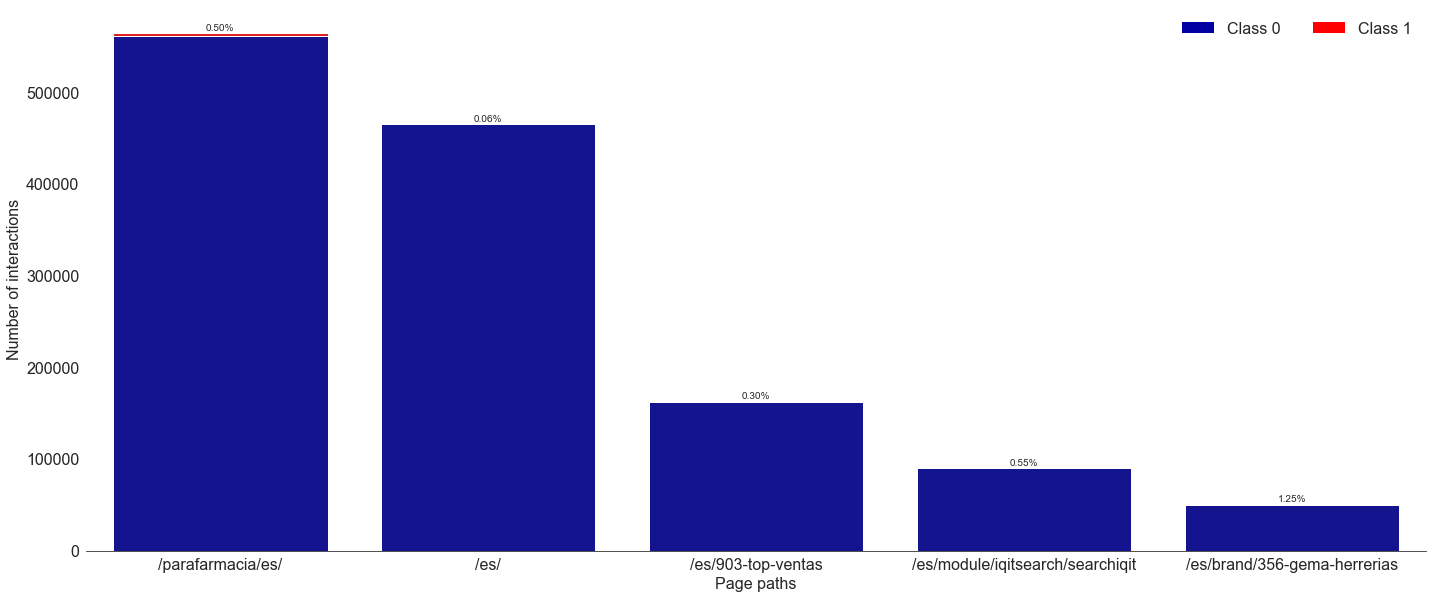

In [73]:
#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - Total interations
sns.barplot(x = plot_data_head['pPath_clean'], y = plot_data_head['total_inter'], color = "red")

#Plot 2 - overlay - Class 0
bottom_plot = sns.barplot(x = plot_data_head['pPath_clean'], y = plot_data_head['0'], color = "#0000A3")

topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Class 0', 'Class 1'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)


sns.despine(left=True)
bottom_plot.set_ylabel("Number of interactions")
bottom_plot.set_xlabel("Page paths")

for i in range(len(plot_data_head['0'])):
    plt.annotate(str(plot_data_head['preval'].values[i])[:4]+"%", xy=(i,plot_data_head['total_inter'].values[i]), ha='center', va='bottom')


#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

## Random Forest

### Data preparation

In [ ]:
del(df)

In [13]:
df = no_carr_ped.copy()

In [14]:
## DISCOUNT COLUMN

# Discount Data
disc_datafile=os.path.join(data_root,'Descuentos.csv')
disc_info=pd.read_csv(disc_datafile,sep=";")
disc_info['FECHA INICIO']=pd.to_datetime(disc_info['FECHA INICIO'],format='%Y%m%d%H%M')
disc_info['FECHA FIN']=pd.to_datetime(disc_info['FECHA FIN'],format='%Y%m%d%H%M')
df['dateTime']=pd.to_datetime(df['ga:dateHourMinute'],format='%Y%m%d%H%M')
disc_info.rename(columns={"PORCENTAJE DESCUENTO": "PORCENTAJE_DESCUENTO","FECHA INICIO": "FECHA_INICIO","FECHA FIN": "FECHA_FIN"}, inplace=True)

# Merge with PandasSQL
import sqlite3
conn = sqlite3.connect(":memory:") 
df.to_sql("df", conn, index=False)
disc_info.to_sql("disc_info", conn, index=False)
qry = "SELECT * FROM df LEFT JOIN disc_info ON df.dateTime>=disc_info.FECHA_INICIO AND df.dateTime<=disc_info.FECHA_FIN"
df = pd.read_sql_query(qry,conn)
df.drop(['dateTime','Nombre','FECHA_INICIO','FECHA_FIN'],axis=1, inplace=True)
df.rename(columns={"PORCENTAJE_DESCUENTO": "Web_Discount"}, inplace=True)
df['Web_Discount'].fillna(0,inplace=True)
del(disc_info)
df.info()

# Check NUMERICAL DATA - DATA EXPLORATION and FE (Price and Discounts).ipynb Notebook for more information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3628293 entries, 0 to 3628292
Data columns (total 20 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   ga:productSKU                object 
 1   ga:dateHourMinute            int64  
 2   ga:pagePath                  object 
 3   ga:pageDepth                 int64  
 4   ga:userType                  object 
 5   ga:sessionCount              int64  
 6   ga:daysSinceLastSession      int64  
 7   ga:landingPagePath           object 
 8   ga:campaign                  object 
 9   ga:sourceMedium              object 
 10  ga:city                      object 
 11  ga:deviceCategory            object 
 12  ga:operatingSystem           object 
 13  ga:productListViews          int64  
 14  ga:productListClicks         int64  
 15  ga:productDetailViews        int64  
 16  ga:productAddsToCart         int64  
 17  ga:productAddsToCart_transf  int64  
 18  pPath_clean                  object 
 19  

In [15]:
# Merge Product Price from Product Catalog in Prestashop

prod_datafile=os.path.join(data_root,'product_2021-02-09_103558.csv')
prod_info=pd.read_csv(prod_datafile,sep=";")
prod_price_info=prod_info[['Product ID','Precio (imp. incl.)']]
df['ga:productSKU']= df['ga:productSKU'].astype('str')
prod_price_info['Product ID']=prod_price_info['Product ID'].astype('str')
df = df.merge(prod_price_info,left_on='ga:productSKU', right_on='Product ID',how='left')
df.drop('Product ID',axis=1,inplace=True)
df.rename(columns={"Precio (imp. incl.)": "Product_price"}, inplace=True)
del(prod_info)
df.info()

<ipython-input-15-9ef0a2bf303e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_price_info['Product ID']=prod_price_info['Product ID'].astype('str')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3628293 entries, 0 to 3628292
Data columns (total 21 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   ga:productSKU                object 
 1   ga:dateHourMinute            int64  
 2   ga:pagePath                  object 
 3   ga:pageDepth                 int64  
 4   ga:userType                  object 
 5   ga:sessionCount              int64  
 6   ga:daysSinceLastSession      int64  
 7   ga:landingPagePath           object 
 8   ga:campaign                  object 
 9   ga:sourceMedium              object 
 10  ga:city                      object 
 11  ga:deviceCategory            object 
 12  ga:operatingSystem           object 
 13  ga:productListViews          int64  
 14  ga:productListClicks         int64  
 15  ga:productDetailViews        int64  
 16  ga:productAddsToCart         int64  
 17  ga:productAddsToCart_transf  int64  
 18  pPath_clean                  object 
 19  

In [16]:
df.to_csv(data_root+'no_carrito_no_pedido_df_2019_2020_jan21.csv')

In [4]:
!ls ../data/

Descuentos.csv
df_city_device_OS_campaign_2019_2020_jan21.csv
df_city_device_OS_campaign_2019.csv
df_city_device_OS_campaign_2020.csv
df_city_device_OS_campaign_apr19.csv
df_city_device_OS_campaign_apr20.csv
df_city_device_OS_campaign_aug19.csv
df_city_device_OS_campaign_aug20.csv
df_city_device_OS_campaign_dec19.csv
df_city_device_OS_campaign_dec20.csv
df_city_device_OS_campaign_feb20.csv
df_city_device_OS_campaign_jan20.csv
df_city_device_OS_campaign_jan21.csv
df_city_device_OS_campaign_jul19.csv
df_city_device_OS_campaign_jul20.csv
df_city_device_OS_campaign_jun19.csv
df_city_device_OS_campaign_jun20.csv
df_city_device_OS_campaign_mar20.csv
df_city_device_OS_campaign_may19.csv
df_city_device_OS_campaign_may20.csv
df_city_device_OS_campaign_nov19.csv
df_city_device_OS_campaign_nov20.csv
df_city_device_OS_campaign_oct19.csv
df_city_device_OS_campaign_oct20.csv
df_city_device_OS_campaign_sep19.csv
df_city_device_OS_campaign_sep20.csv
df_city_device_OS_mobinfo_jan21.csv
df_city_pDepth_O

In [6]:
data_root="../data/"
datafile=os.path.join(data_root,'no_carrito_no_pedido_df_2019_2020_jan21.csv')
df=pd.read_csv(datafile)
print(df.shape)
df.head(3)

/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(3628293, 22)


,Unnamed: 0,ga:productSKU,ga:dateHourMinute,ga:pagePath,ga:pageDepth,ga:userType,ga:sessionCount,ga:daysSinceLastSession,ga:landingPagePath,ga:campaign,...,ga:deviceCategory,ga:operatingSystem,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart,ga:productAddsToCart_transf,pPath_clean,Web_Discount,Product_price
0,0,1008,201904301452,/parafarmacia/es/,1,New Visitor,1,0,/parafarmacia/es/,(not set),...,mobile,iOS,1,0,0,0,0,/parafarmacia/es/,0.0,3.47
1,1,1008,201904301524,/parafarmacia/es/,3,New Visitor,1,0,/parafarmacia/es/,(not set),...,desktop,Windows,1,0,0,0,0,/parafarmacia/es/,0.0,3.47
2,2,1008,201904301545,/parafarmacia/es/,7,Returning Visitor,33,0,/parafarmacia/es/,(not set),...,desktop,Windows,1,0,0,0,0,/parafarmacia/es/,0.0,3.47


In [7]:
df.drop('Unnamed: 0', axis=1, inplace=True)
print(df.shape)
print("")
df.info()

(3628293, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3628293 entries, 0 to 3628292
Data columns (total 21 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   ga:productSKU                object 
 1   ga:dateHourMinute            int64  
 2   ga:pagePath                  object 
 3   ga:pageDepth                 int64  
 4   ga:userType                  object 
 5   ga:sessionCount              int64  
 6   ga:daysSinceLastSession      int64  
 7   ga:landingPagePath           object 
 8   ga:campaign                  object 
 9   ga:sourceMedium              object 
 10  ga:city                      object 
 11  ga:deviceCategory            object 
 12  ga:operatingSystem           object 
 13  ga:productListViews          int64  
 14  ga:productListClicks         int64  
 15  ga:productDetailViews        int64  
 16  ga:productAddsToCart         int64  
 17  ga:productAddsToCart_transf  int64  
 18  pPath_clean                

In [8]:
# Product SKU as string
df['ga:productSKU']=df['ga:productSKU'].astype('str')

# dateHourMinute as SIN and COS
df['ga:dateHourMinute']=pd.to_datetime(df['ga:dateHourMinute'],format='%Y%m%d%H%M')
df['dateTime_month']=df['ga:dateHourMinute'].dt.month
df['dateTime_dayofweek']=df['ga:dateHourMinute'].dt.dayofweek
df['dateTime_hour']=df['ga:dateHourMinute'].dt.hour
df['month_sin']=np.sin((df.dateTime_month-1)*(2.*np.pi/12)) # I substract minus 1 to 'df.dateTime_month' because its values are coded as 1 to 12 instead of 0 to 11
df['month_cos']=np.cos((df.dateTime_month-1)*(2.*np.pi/12)) # I substract minus 1 to 'df.dateTime_month' because its values are coded as 1 to 12 instead of 0 to 11
df['dayofweek_sin']=np.sin(df.dateTime_dayofweek*(2.*np.pi/7))
df['dayofweek_cos']=np.cos(df.dateTime_dayofweek*(2.*np.pi/7))
df['hour_sin']=np.sin(df.dateTime_hour*(2.*np.pi/24))
df['hour_cos']=np.cos(df.dateTime_hour*(2.*np.pi/24))
df.drop(['dateTime_month','dateTime_dayofweek','dateTime_hour'],axis=1, inplace=True)

# Source Medium as 2 columns:
source_medium = df['ga:sourceMedium'].str.split('/',expand=True)
source_medium.columns=['Source','Medium']
df= df.merge(source_medium,left_index=True,right_index=True,how='left')
del(source_medium)
df['Source']=df['Source'].astype('str').str.strip()
df['Medium']=df['Medium'].astype('str').str.strip()

# City
df['ga:city']=df['ga:city'].astype('str')

# Device
df['ga:deviceCategory']=df['ga:deviceCategory'].astype('str')

# Operating System
df['ga:operatingSystem']=df['ga:operatingSystem'].astype('str')

# User Type
df['Returning_Visitor']= np.where(df['ga:userType']=='Returning Visitor',1,0)

# Page Path and Landing Page Path as string
df['ga:pagePath']=df['ga:pagePath'].astype('str')
df['ga:landingPagePath']=df['ga:landingPagePath'].astype('str')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3628293 entries, 0 to 3628292
Data columns (total 30 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   ga:productSKU                object        
 1   ga:dateHourMinute            datetime64[ns]
 2   ga:pagePath                  object        
 3   ga:pageDepth                 int64         
 4   ga:userType                  object        
 5   ga:sessionCount              int64         
 6   ga:daysSinceLastSession      int64         
 7   ga:landingPagePath           object        
 8   ga:campaign                  object        
 9   ga:sourceMedium              object        
 10  ga:city                      object        
 11  ga:deviceCategory            object        
 12  ga:operatingSystem           object        
 13  ga:productListViews          int64         
 14  ga:productListClicks         int64         
 15  ga:productDetailViews        int64         
 16  

### Pipeline

In [9]:
# 'Operating System' Transformer

important_os = ['Android','iOS','Windows','Macintosh']

class OSTransfomer(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform (self,X,y=None):
        X_=X.copy()
        X_['ga:operatingSystem']=X_['ga:operatingSystem'].apply(lambda os: 'other OS' if os not in important_os else os)
        return X_
    
# Compile 'Source'

def source_compiler(x):
    
    insta_words= ['instagram','ig','linktr.ee']
    for seq in insta_words:
        if seq in x.lower():
            return 'instagram'
    if 'facebook' in x.lower():
        return 'facebook'
    if 'youtube' in x.lower():
        return 'youtube'  
    if 'vogue' in x.lower():
        return 'vogue'
    if 'yahoo' in x.lower():
        return 'yahoo'
    else:
        return x

important_sources = ['google','(direct)','instagram','facebook','sendinblue','youtube','bing','yahoo','vogue','cantabrialabs.es']

class SourceTransfomer(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform (self,X,y=None):
        X_=X.copy()
        X_['Source']=X_['Source'].apply(source_compiler)
        X_['Source']=X_['Source'].apply(lambda source: 'other sources' if source not in important_sources else source)
        return X_
    
# Compile 'Medium':

def medium_compiler(x):
    
    if 'cpc' in x.lower():
        return 'cpc'
    if x=='Social':
        return 'IGShopping'  
    if x=='facebook':
        return 'facebook ads'
    if x=='trafico':
        return 'facebook trafico'
    else:
        return x
    
class MediumTransfomer(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform (self,X,y=None):
        X_=X.copy()
        X_['Medium']=X_['Medium'].apply(medium_compiler)
        return X_
    
# Transform column into 'Category' type

class AsTypeCategoryTransfomer(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform (self,X,y=None):
        X_=X.copy()
        X_=X_.astype('category')
        for column in X_.columns:
            X_[column]=X_[column].cat.codes.astype('category')
        return X_

In [10]:
# Pipeline:

source_preprocessing = Pipeline([
    ('source_transf',SourceTransfomer()),
    ('astypecat_transf',AsTypeCategoryTransfomer()),
    ('ohe',OneHotEncoder()) # handle_unknown is default 'error'
])

medium_preprocessing = Pipeline([
    ('medium_transf',MediumTransfomer()),
    ('astypecat_transf',AsTypeCategoryTransfomer()),
    ('ohe',OneHotEncoder(drop='first')) #to drop (none) that is equal to (direct) in Source
]) # handle_unknown is default 'error'

device_preprocessing = Pipeline([
    ('astypecat_transf',AsTypeCategoryTransfomer()),
    ('ohe',OneHotEncoder()) # handle_unknown is default 'error'
])

os_preprocessing = Pipeline([
    ('os_transf',OSTransfomer()),
    ('astypecat_transf',AsTypeCategoryTransfomer()),
    ('ohe',OneHotEncoder()) # handle_unknown is default 'error'
])

targetencod_preprocessing = Pipeline([('target_encoding',TargetEncoder())])

preprocess = ColumnTransformer([
    ('source_preprocessing',source_preprocessing,['Source']),
    ('medium_preprocessing',medium_preprocessing,['Medium']),
    ('device_preprocessing',device_preprocessing,['ga:deviceCategory']),
    ('os_preprocessing',os_preprocessing,['ga:operatingSystem']),
    ('targetencod_preprocessing',targetencod_preprocessing,['ga:productSKU','ga:city','ga:pagePath']),
    ('impute_median',SimpleImputer(strategy='median'),['Product_price'])
],remainder='passthrough')

pipeline=Pipeline([
    ('preprocess',preprocess),
    ('clrf',RandomForestClassifier())
])

### Classifier with Page Path row

In [11]:
# Data

features=['ga:pageDepth','ga:sessionCount','ga:daysSinceLastSession','ga:productSKU',\
          'month_sin','month_cos','dayofweek_sin','dayofweek_cos','hour_sin','hour_cos',\
          'Source','Medium','ga:city','ga:deviceCategory','ga:operatingSystem','Returning_Visitor',\
          'Product_price','Web_Discount','ga:pagePath']

y=df['ga:productAddsToCart_transf']
X=df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)
del(df)

/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


TRAINING SCORE: 0.9972240381975872
ACCURACY: 0.9871355589510888
PRECISION: 0.3293879907621247
RECALL: 0.10880137312863546
F1 SCORE: 0.1635725037631711
AUC: 0.8916417072769376


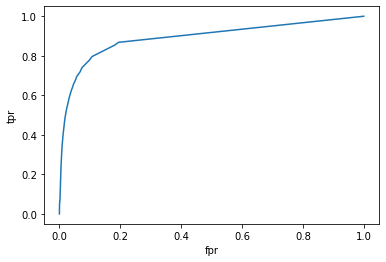

In [12]:
evaluate(pipeline,X_train, X_test, y_train, y_test)

In [13]:
print(classification_report(y_test,pipeline.predict(X_test)))
clrf_cm = confusion_matrix(y_test,pipeline.predict(X_test))
clrf_cm

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    896587
           1       0.33      0.11      0.16     10487

    accuracy                           0.99    907074
   macro avg       0.66      0.55      0.58    907074
weighted avg       0.98      0.99      0.98    907074



array([[894264,   2323],
       [  9346,   1141]])

### Classifier with Page Path Clean

In [ ]:
# Pipeline:

source_preprocessing = Pipeline([
    ('source_transf',SourceTransfomer()),
    ('astypecat_transf',AsTypeCategoryTransfomer()),
    ('ohe',OneHotEncoder()) # handle_unknown is default 'error'
])

medium_preprocessing = Pipeline([
    ('medium_transf',MediumTransfomer()),
    ('astypecat_transf',AsTypeCategoryTransfomer()),
    ('ohe',OneHotEncoder(drop='first')) #to drop (none) that is equal to (direct) in Source
]) # handle_unknown is default 'error'

device_preprocessing = Pipeline([
    ('astypecat_transf',AsTypeCategoryTransfomer()),
    ('ohe',OneHotEncoder()) # handle_unknown is default 'error'
])

os_preprocessing = Pipeline([
    ('os_transf',OSTransfomer()),
    ('astypecat_transf',AsTypeCategoryTransfomer()),
    ('ohe',OneHotEncoder()) # handle_unknown is default 'error'
])

targetencod_preprocessing = Pipeline([('target_encoding',TargetEncoder())])

preprocess = ColumnTransformer([
    ('source_preprocessing',source_preprocessing,['Source']),
    ('medium_preprocessing',medium_preprocessing,['Medium']),
    ('device_preprocessing',device_preprocessing,['ga:deviceCategory']),
    ('os_preprocessing',os_preprocessing,['ga:operatingSystem']),
    ('targetencod_preprocessing',targetencod_preprocessing,['ga:productSKU','ga:city','pPath_clean']),
    ('impute_median',SimpleImputer(strategy='median'),['Product_price'])
],remainder='passthrough')

pipeline=Pipeline([
    ('preprocess',preprocess),
    ('clrf',RandomForestClassifier())
])

In [ ]:
# Data

features=['ga:pageDepth','ga:sessionCount','ga:daysSinceLastSession','ga:productSKU',\
          'month_sin','month_cos','dayofweek_sin','dayofweek_cos','hour_sin','hour_cos',\
          'Source','Medium','ga:city','ga:deviceCategory','ga:operatingSystem','Returning_Visitor',\
          'Product_price','Web_Discount','pPath_clean']

y=df['ga:productAddsToCart_transf']
X=df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)
del(df)

In [ ]:
evaluate(pipeline,X_train, X_test, y_train, y_test)